In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
import seaborn as sns
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [2]:
df=pd.read_csv("google_review_ratings.csv")

In [3]:
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
df["Unnamed: 25"].unique()

array([ nan, 1.04, 2.58])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [6]:
df.isnull().sum()

User              0
Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       0
Category 12       1
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       1
Unnamed: 25    5454
dtype: int64

In [7]:
df.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,2.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755,1.810000
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756,1.088944
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,1.810000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,2.195000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.580000


In [8]:
df=df.iloc[:,1:]
df.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [9]:
df["Category 11"].unique()

array(['1.7', '1.73', '1.71', '1.69', '1.67', '1.65', '1.66', '1.64',
       '1.63', '5', '1.56', '1.55', '1.53', '1.52', '1.51', '1.5', '1.49',
       '1.48', '1.46', '2.13', '2.12', '2.1', '2.09', '2.08', '2.07',
       '2.06', '2.05', '2.04', '2.03', '2.01', '2', '1.98', '1.97',
       '1.95', '1.93', '1.91', '1.9', '1.88', '1.86', '1.84', '1.83',
       '1.81', '1.79', '1.77', '1.74', '1.72', '1.68', '1.61', '1.6',
       '1.59', '1.58', '1.99', '2.47', '2.35', '2.48', '2.59', '3.39',
       '2.31', '2.78', '2.79', '2.77', '2.76', '2.75', '2.74', '2.72',
       '2.71', '2.69', '2.68', '2.66', '2.65', '2.63', '2.61', '2.57',
       '2.55', '2.53', '2.51', '2.49', '1.94', '1.92', '1.82', '1.76',
       '1.62', '4.08', '4.04', '4.02', '4.01', '4', '3.99', '3.98',
       '3.96', '3.95', '3.94', '3.93', '3.91', '3.9', '3.88', '3.87',
       '3.86', '3.84', '3.85', '2.17', '3', '2.99', '2.82', '2.83',
       '2.81', '2.8', '2.73', '2.67', '2.64', '2.62', '2.54', '2.52',
       '2.5', '2.

In [10]:
df["Category 11"]=df["Category 11"].replace("2\t2.",np.NaN)

In [11]:
df["Category 11"].unique()

array(['1.7', '1.73', '1.71', '1.69', '1.67', '1.65', '1.66', '1.64',
       '1.63', '5', '1.56', '1.55', '1.53', '1.52', '1.51', '1.5', '1.49',
       '1.48', '1.46', '2.13', '2.12', '2.1', '2.09', '2.08', '2.07',
       '2.06', '2.05', '2.04', '2.03', '2.01', '2', '1.98', '1.97',
       '1.95', '1.93', '1.91', '1.9', '1.88', '1.86', '1.84', '1.83',
       '1.81', '1.79', '1.77', '1.74', '1.72', '1.68', '1.61', '1.6',
       '1.59', '1.58', '1.99', '2.47', '2.35', '2.48', '2.59', '3.39',
       '2.31', '2.78', '2.79', '2.77', '2.76', '2.75', '2.74', '2.72',
       '2.71', '2.69', '2.68', '2.66', '2.65', '2.63', '2.61', '2.57',
       '2.55', '2.53', '2.51', '2.49', '1.94', '1.92', '1.82', '1.76',
       '1.62', '4.08', '4.04', '4.02', '4.01', '4', '3.99', '3.98',
       '3.96', '3.95', '3.94', '3.93', '3.91', '3.9', '3.88', '3.87',
       '3.86', '3.84', '3.85', '2.17', '3', '2.99', '2.82', '2.83',
       '2.81', '2.8', '2.73', '2.67', '2.64', '2.62', '2.54', '2.52',
       '2.5', '2.

In [12]:
median1=df["Category 11"].median()
df["Category 11"]=df["Category 11"].replace(np.nan,median1)

In [13]:
median2=df["Unnamed: 25"].median()
df["Unnamed: 25"]=df["Unnamed: 25"].replace(np.nan,median2)

In [14]:
df['Category 11'] = df['Category 11'].astype(float) 

In [15]:
median3=df["Category 12"].median()
df["Category 12"]=df["Category 12"].replace(np.nan,median3)

In [16]:
median4=df["Category 24"].median()
df["Category 24"]=df["Category 24"].replace(np.nan,median4)

In [17]:
df1=df.apply(zscore)
df1

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,-1.759118,-1.632094,0.914217,0.651710,1.524392,0.020674,1.166442,-0.171688,-0.586741,-0.147398,...,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.163040,-1.332175,0.0
1,-1.759118,-1.632094,0.914217,0.651710,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.139750,...,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.163040,-1.332175,0.0
2,-1.759118,-1.632094,0.914217,0.636432,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.147398,...,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.163040,-1.332175,0.0
3,-1.759118,-1.280305,0.914217,0.636432,1.524392,0.020674,1.166442,-0.171688,-0.586741,-0.147398,...,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.163040,-1.332175,0.0
4,-1.759118,-1.632094,0.914217,0.636432,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.147398,...,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.163040,-1.332175,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,-0.659458,1.885794,1.210762,-0.005260,-0.141113,-0.252276,-0.651917,-1.305507,-0.999515,-1.371065,...,-0.481343,-0.307364,-0.171354,-0.232428,3.350637,0.090520,2.032709,2.634136,-0.000602,0.0
5452,-0.635290,1.885794,1.226791,-0.005260,-0.133644,-0.252276,-1.118888,-1.323504,-1.006886,-1.386361,...,-0.490378,-0.317637,-0.181905,0.515166,0.519298,0.101275,2.032709,2.634136,-0.401781,0.0
5453,-0.623205,1.885794,1.234806,0.002379,-0.133644,-0.252276,-1.133039,-1.341501,-1.014256,-1.401657,...,-0.490378,-0.327910,-0.192455,-0.190895,3.350637,0.112031,2.032709,2.634136,-0.384710,0.0
5454,-0.611121,1.217396,1.250836,0.010018,-0.126175,-0.353658,-1.125963,-1.359498,-1.021627,-1.416953,...,-0.499412,-0.327910,-0.192455,-0.182589,3.350637,0.122786,2.032709,2.634136,-0.376174,0.0


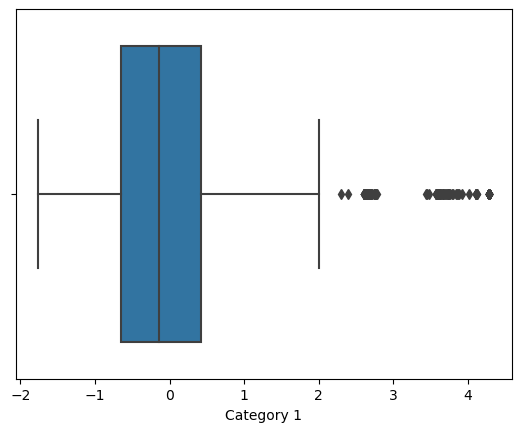

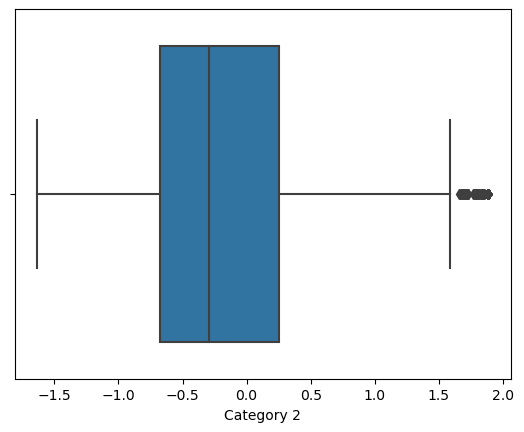

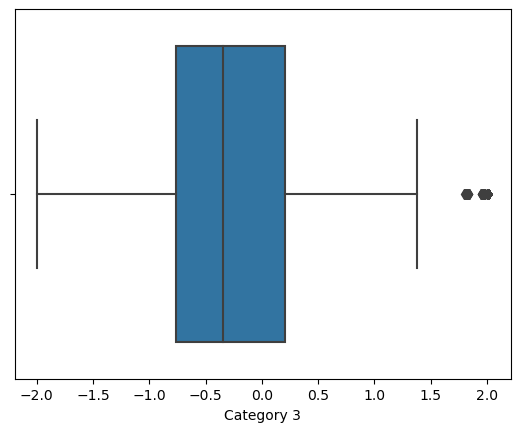

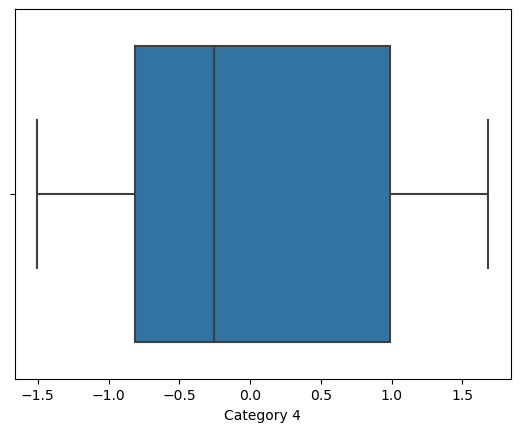

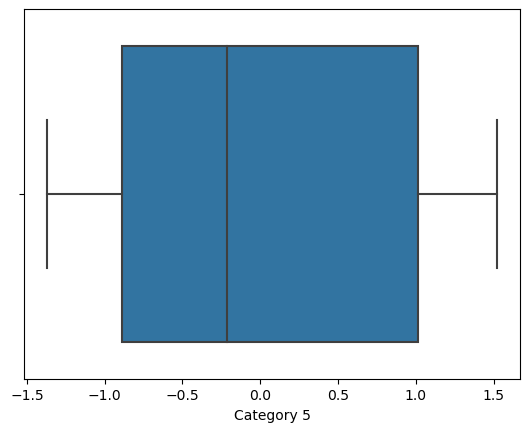

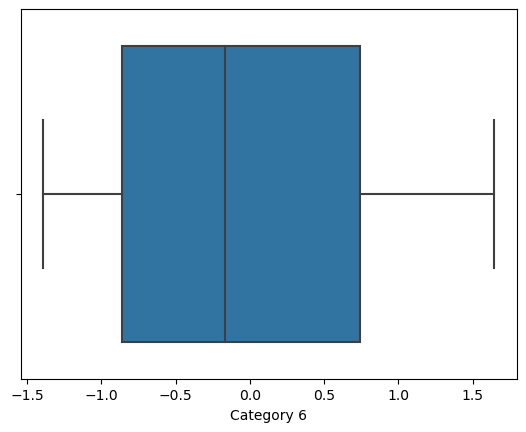

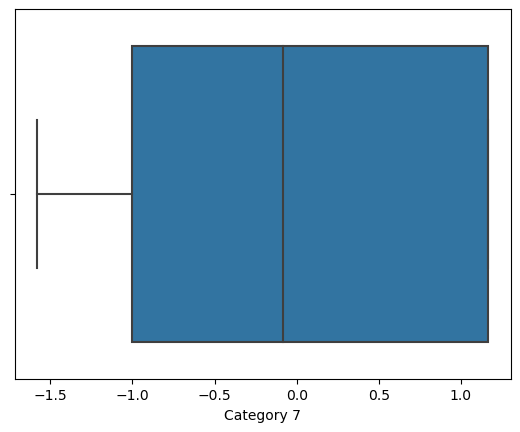

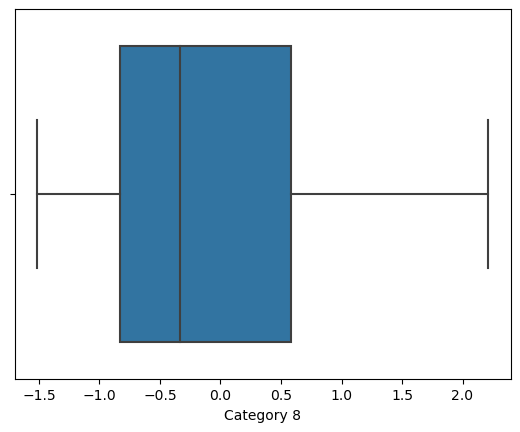

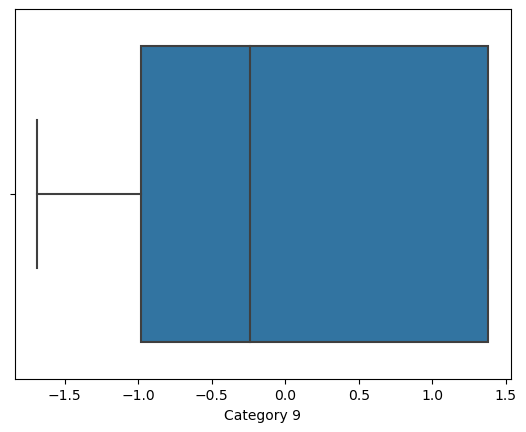

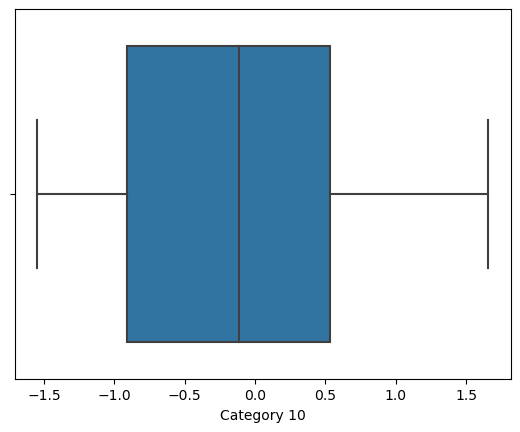

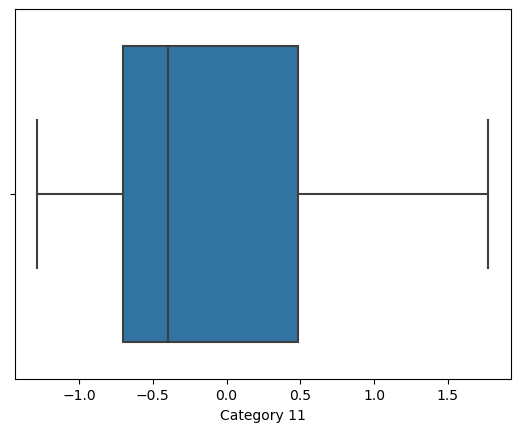

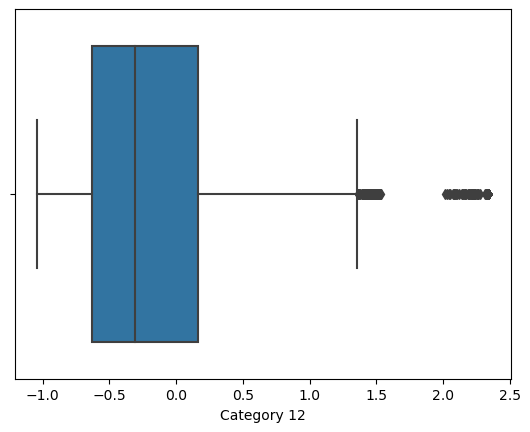

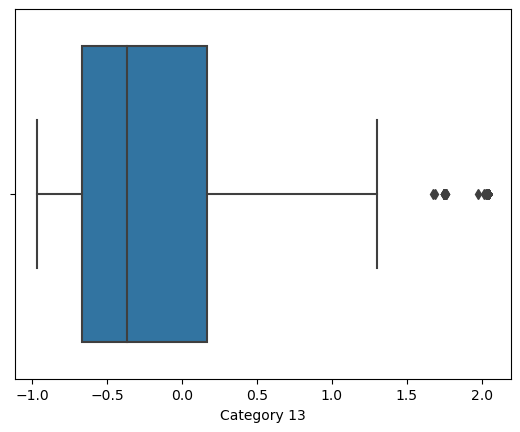

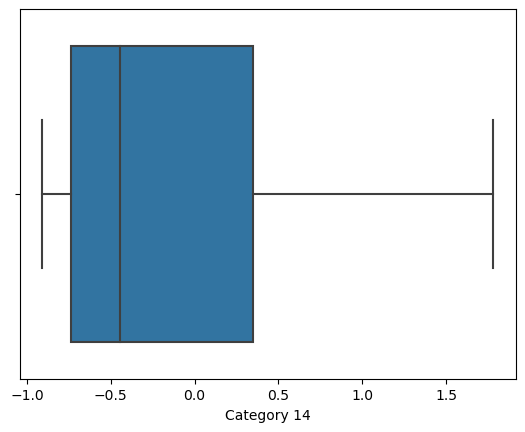

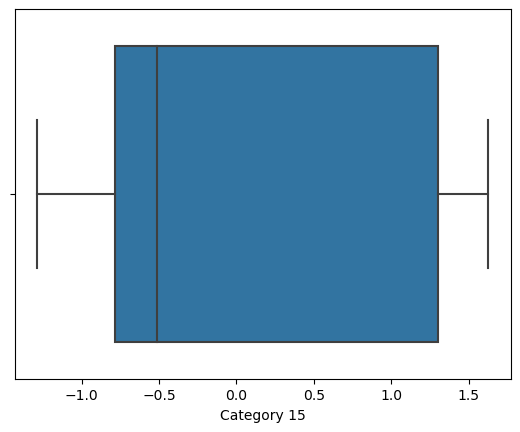

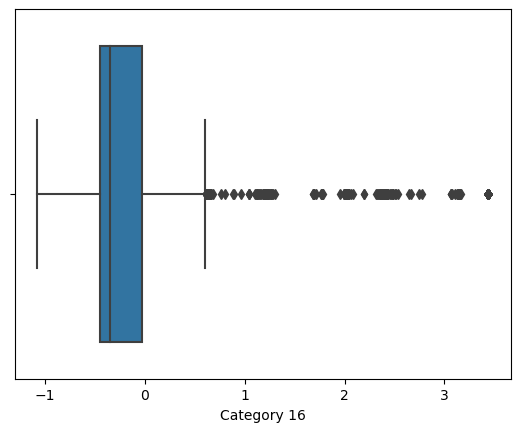

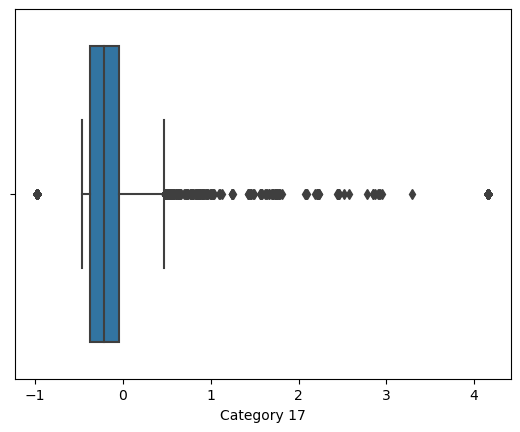

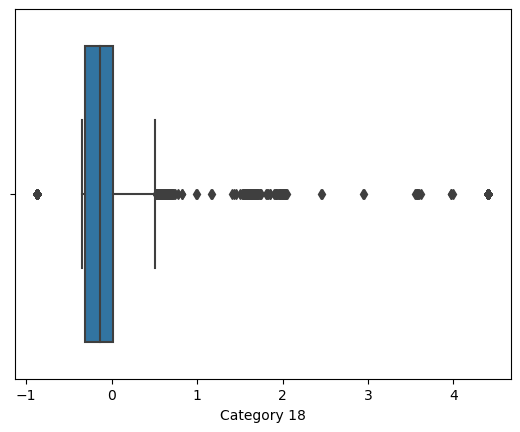

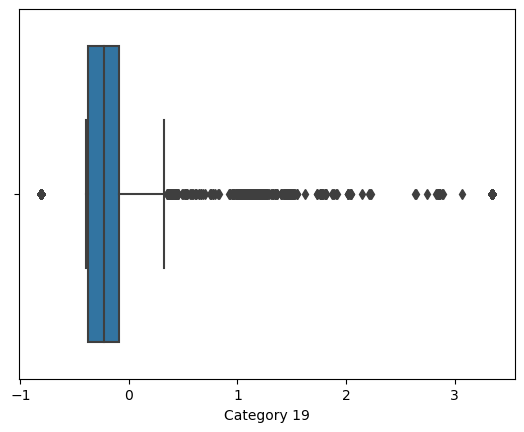

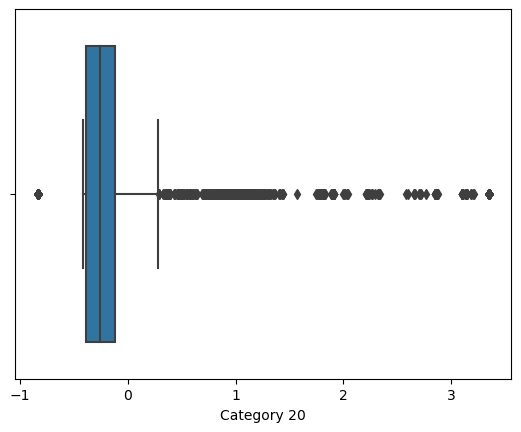

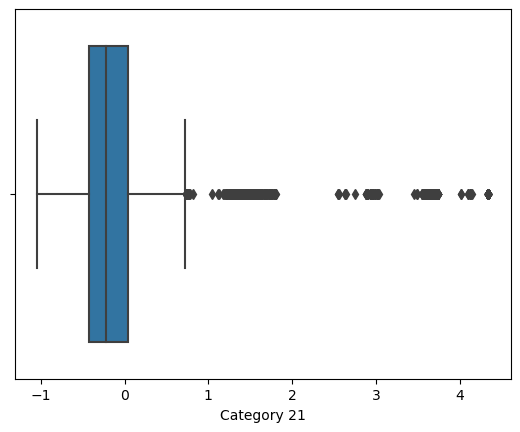

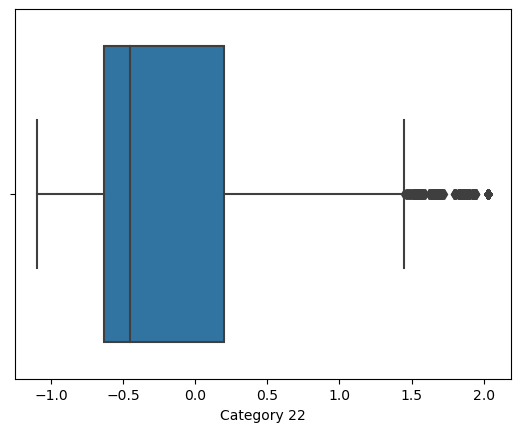

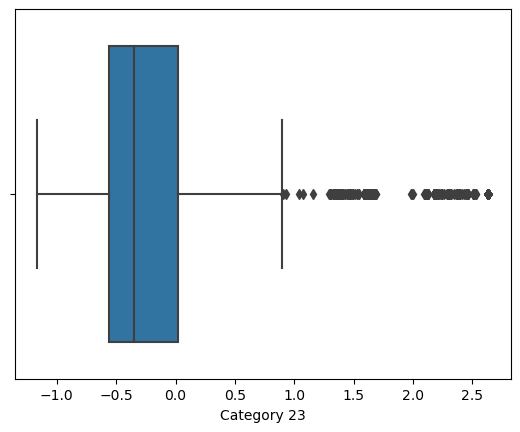

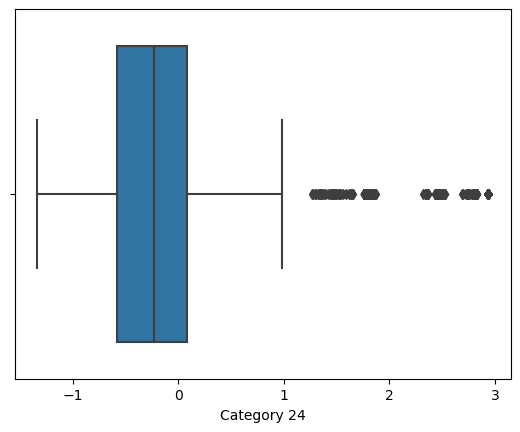

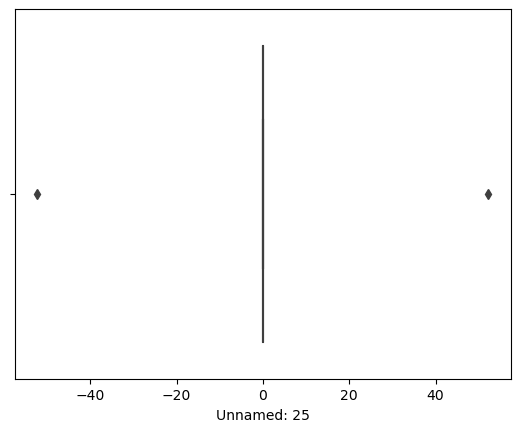

In [18]:
for i in df1.columns:
    sns.boxplot(data=df1,x=i)
    plt.show()

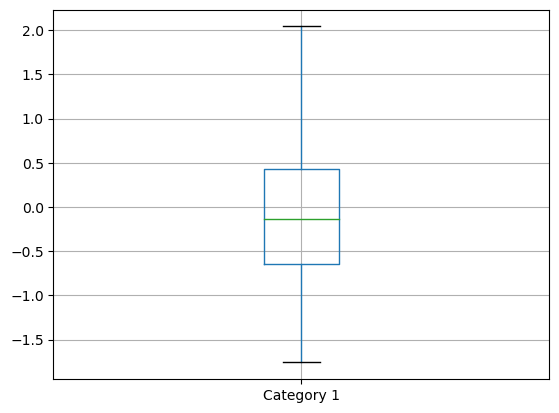

In [19]:
def removeout(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lr=q1-(1.5*IQR)
    ur=q3+(1.5*IQR)
    return lr,ur
lowlead_time,uplead_time=removeout(df1["Category 1"])
df1["Category 1"]=np.where(df1["Category 1"]>uplead_time,uplead_time,df1["Category 1"])
df1["Category 1"]=np.where(df1["Category 1"]<lowlead_time,lowlead_time,df1["Category 1"])
df1.boxplot(column=["Category 1"])
plt.show()

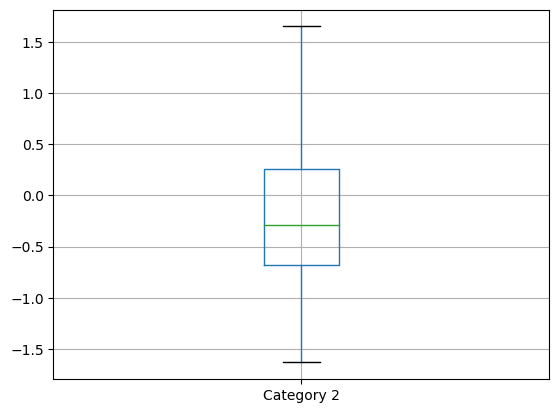

In [20]:
lowlead_time,uplead_time=removeout(df1["Category 2"])
df1["Category 2"]=np.where(df1["Category 2"]>uplead_time,uplead_time,df1["Category 2"])
df1["Category 2"]=np.where(df1["Category 2"]<lowlead_time,lowlead_time,df1["Category 2"])
df1.boxplot(column=["Category 2"])
plt.show()

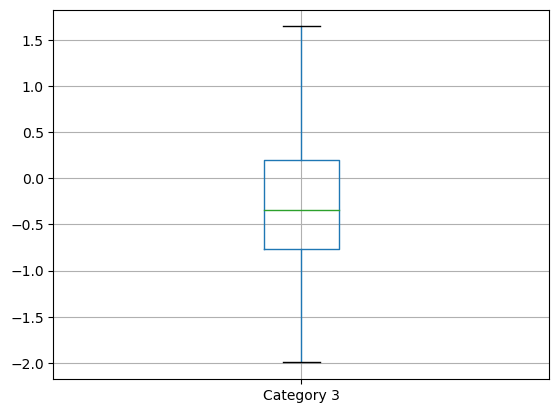

In [21]:
lowlead_time,uplead_time=removeout(df1["Category 3"])
df1["Category 3"]=np.where(df1["Category 3"]>uplead_time,uplead_time,df1["Category 3"])
df1["Category 3"]=np.where(df1["Category 3"]<lowlead_time,lowlead_time,df1["Category 3"])
df1.boxplot(column=["Category 3"])
plt.show()

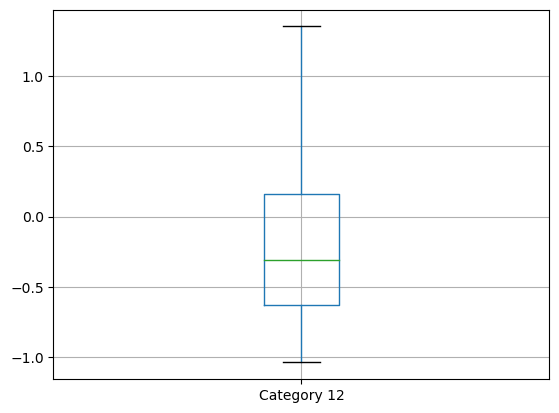

In [22]:
lowlead_time,uplead_time=removeout(df1["Category 12"])
df1["Category 12"]=np.where(df1["Category 12"]>uplead_time,uplead_time,df1["Category 12"])
df1["Category 12"]=np.where(df1["Category 12"]<lowlead_time,lowlead_time,df1["Category 12"])
df1.boxplot(column=["Category 12"])
plt.show()

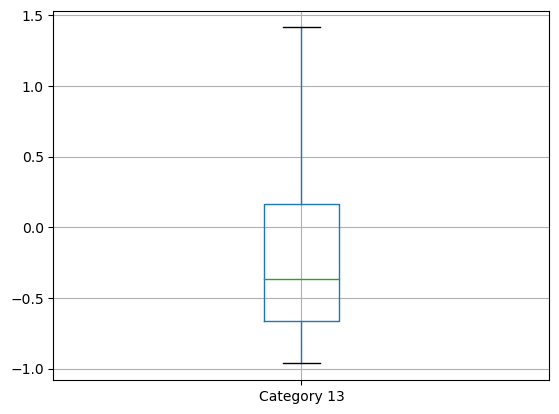

In [23]:
lowlead_time,uplead_time=removeout(df1["Category 13"])
df1["Category 13"]=np.where(df1["Category 13"]>uplead_time,uplead_time,df1["Category 13"])
df1["Category 13"]=np.where(df1["Category 13"]<lowlead_time,lowlead_time,df1["Category 13"])
df1.boxplot(column=["Category 13"])
plt.show()

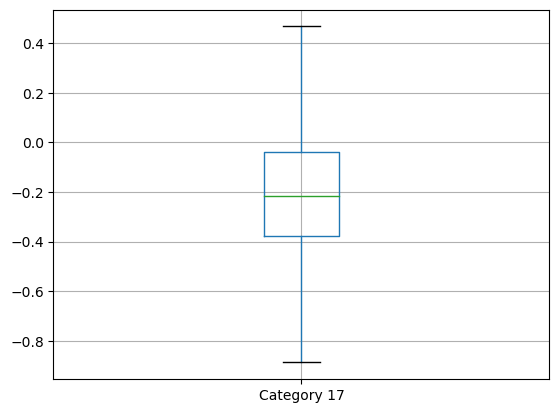

In [24]:
lowlead_time,uplead_time=removeout(df1["Category 17"])
df1["Category 17"]=np.where(df1["Category 17"]>uplead_time,uplead_time,df1["Category 17"])
df1["Category 17"]=np.where(df1["Category 17"]<lowlead_time,lowlead_time,df1["Category 17"])
df1.boxplot(column=["Category 17"])
plt.show()

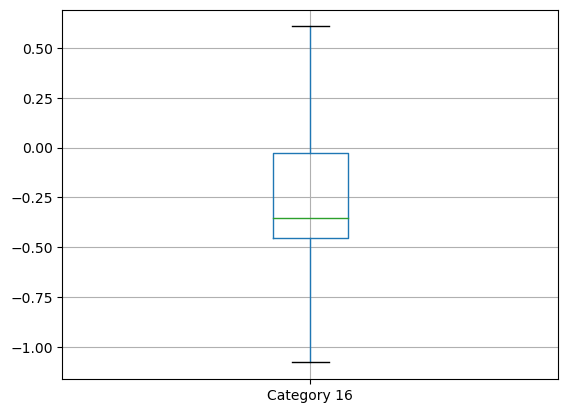

In [25]:
lowlead_time,uplead_time=removeout(df1["Category 16"])
df1["Category 16"]=np.where(df1["Category 16"]>uplead_time,uplead_time,df1["Category 16"])
df1["Category 16"]=np.where(df1["Category 16"]<lowlead_time,lowlead_time,df1["Category 16"])
df1.boxplot(column=["Category 16"])
plt.show()

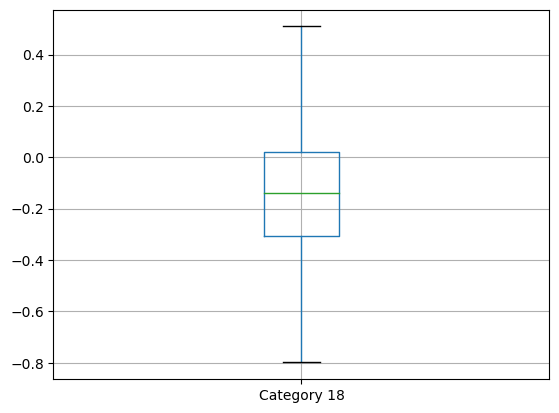

In [26]:
lowlead_time,uplead_time=removeout(df1["Category 18"])
df1["Category 18"]=np.where(df1["Category 18"]>uplead_time,uplead_time,df1["Category 18"])
df1["Category 18"]=np.where(df1["Category 18"]<lowlead_time,lowlead_time,df1["Category 18"])
df1.boxplot(column=["Category 18"])
plt.show()

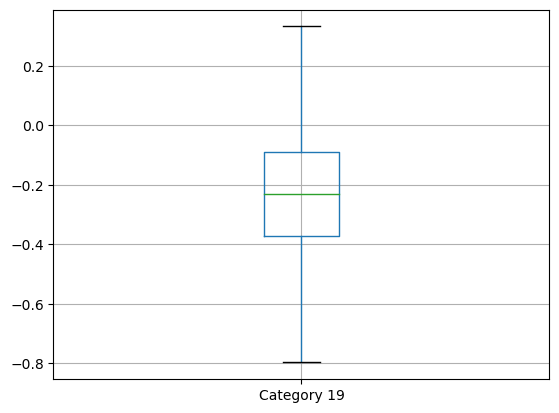

In [27]:
lowlead_time,uplead_time=removeout(df1["Category 19"])
df1["Category 19"]=np.where(df1["Category 19"]>uplead_time,uplead_time,df1["Category 19"])
df1["Category 19"]=np.where(df1["Category 19"]<lowlead_time,lowlead_time,df1["Category 19"])
df1.boxplot(column=["Category 19"])
plt.show()

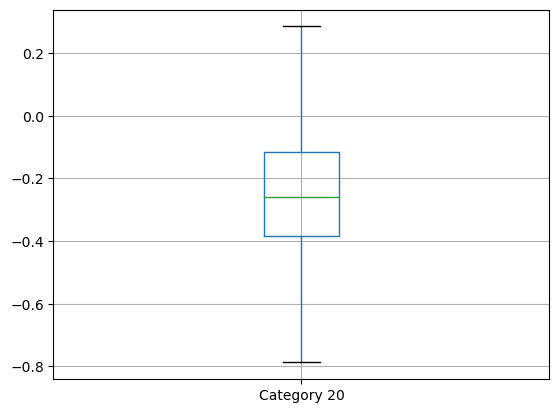

In [28]:
lowlead_time,uplead_time=removeout(df1["Category 20"])
df1["Category 20"]=np.where(df1["Category 20"]>uplead_time,uplead_time,df1["Category 20"])
df1["Category 20"]=np.where(df1["Category 20"]<lowlead_time,lowlead_time,df1["Category 20"])
df1.boxplot(column=["Category 20"])
plt.show()

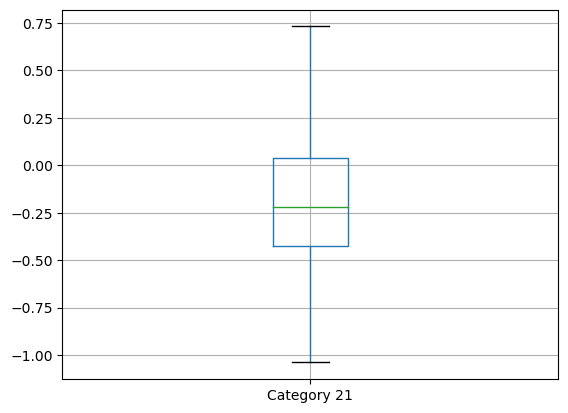

In [29]:
lowlead_time,uplead_time=removeout(df1["Category 21"])
df1["Category 21"]=np.where(df1["Category 21"]>uplead_time,uplead_time,df1["Category 21"])
df1["Category 21"]=np.where(df1["Category 21"]<lowlead_time,lowlead_time,df1["Category 21"])
df1.boxplot(column=["Category 21"])
plt.show()

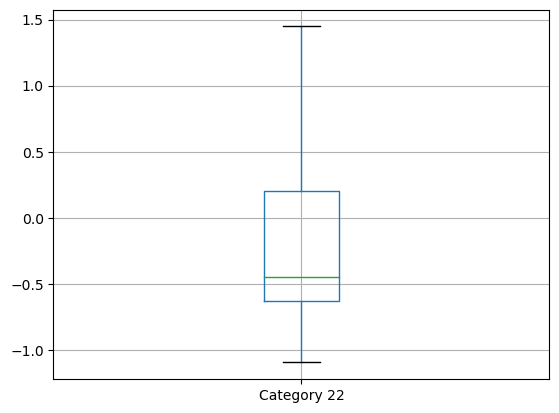

In [30]:
lowlead_time,uplead_time=removeout(df1["Category 22"])
df1["Category 22"]=np.where(df1["Category 22"]>uplead_time,uplead_time,df1["Category 22"])
df1["Category 22"]=np.where(df1["Category 22"]<lowlead_time,lowlead_time,df1["Category 22"])
df1.boxplot(column=["Category 22"])
plt.show()

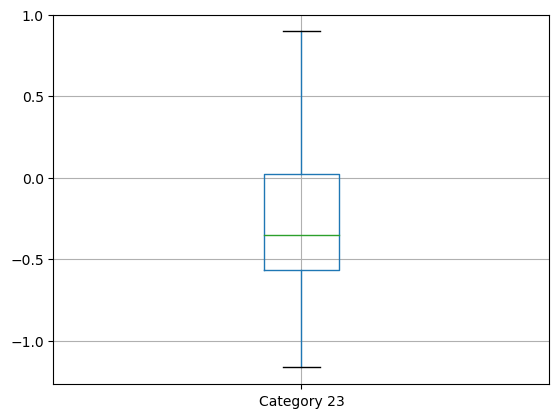

In [31]:
lowlead_time,uplead_time=removeout(df1["Category 23"])
df1["Category 23"]=np.where(df1["Category 23"]>uplead_time,uplead_time,df1["Category 23"])
df1["Category 23"]=np.where(df1["Category 23"]<lowlead_time,lowlead_time,df1["Category 23"])
df1.boxplot(column=["Category 23"])
plt.show()

In [32]:
#sns.pairplot(df1, diag_kind='kde')

In [33]:
from sklearn.cluster import AgglomerativeClustering 

In [34]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')

In [35]:
model.fit(df1)

AgglomerativeClustering(affinity='euclidean', linkage='average')

In [36]:
df1['labels'] = model.labels_
df.head(10)

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.81
1,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.81
2,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.81
3,0.0,0.5,3.63,3.63,5.0,2.92,5.00,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.81
4,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.81
5,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.81
6,0.0,5.0,3.63,3.63,5.0,2.92,3.03,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.81
7,0.0,5.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,2.64,...,0.60,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.81
8,0.0,5.0,3.64,3.64,5.0,2.92,3.03,2.62,2.32,2.63,...,0.60,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.81
9,0.0,5.0,3.64,3.64,5.0,2.92,5.00,2.35,2.32,2.63,...,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.81


In [37]:
Z = linkage(df1, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df1))
c

0.8463030176696269

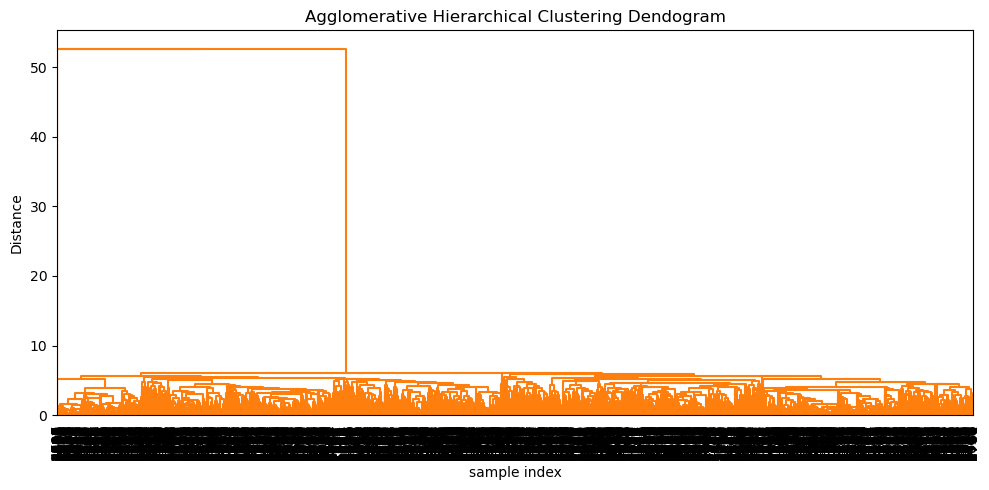

In [38]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

In [39]:
den=sch.dendrogram(z)
plt.tick_params(
         axis='x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
plt.title('Hierarichal Clustering')

NameError: name 'sch' is not defined